## Google Play商店的应用和评论

两个数据集：

    apps.csv: 应用的各项信息，13个特征。
    user_reviews.csv: 每个应用按照最有用的排序前100的评论，评论中的文本处理为三个特征：情感（积极、消极、中立）情感极性和情感主观性。

In [8]:
import pandas as pd
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt

### 1. 读取数据

In [2]:
apps_with_duplicates = pd.read_csv("datasets/apps.csv")

#去重
apps = apps_with_duplicates.drop_duplicates()

# apps个数
print('Total number of apps in the dataset = ', apps.App.count())

# 随机查看5条
n = 5
apps.sample(n)

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3365,4247,Talking Tom Cat,FAMILY,4.3,1838090,NaN,"100,000,000+",Free,0,Everyone 10+,Casual,"July 27, 2018",Varies with device,4.1 and up
4890,5877,Permit Test AZ Arizona MVD DOT,FAMILY,4.6,227,11M,"10,000+",Free,0,Everyone,Education,"October 12, 2017",2.9.0,4.1 and up
4944,5933,Instant Ba-dum-tss,FAMILY,4.0,13,2.0M,"1,000+",Free,0,Everyone,Entertainment,"September 23, 2015",1.0,1.6 and up
2756,3490,Do It Later: Tasks & To-Dos,PRODUCTIVITY,4.5,123412,NaN,"50,000,000+",Free,0,Everyone,Productivity,"April 13, 2018",Varies with device,Varies with device
9055,10225,Video Download For FB,TOOLS,4.3,444,1.6M,"100,000+",Free,0,Everyone,Tools,"July 14, 2017",1.0,3.0 and up


### 2. 清洗数据

In [3]:
# 移除特殊符号
chars_to_remove = ['+','M','$']
cols_to_clean = ["Installs","Size","Price"]

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    apps[col] = pd.to_numeric(apps[col],errors='ignore')  #回归numeric

### 3. 应用分类
<li>哪个类别的应用在市场上的（活跃）应用份额最高？
<li>是否有特定的品类主导着市场？
<li>哪个类别的应用数量最少？

In [4]:
#应用类别数量
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# 每个类别里有多少应用
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, 
        y = num_apps_in_category.values, 
)]

plotly.offline.iplot(data)

Number of categories =  33


由上图可以知道在33个类别中，家庭类、游戏类、工具类排名在前三

### 4. 评分分布情况

In [5]:
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

data=[go.Histogram(x=apps['Rating'])]
layout = {'shapes':[{
                'type':'line',
                'x0':avg_app_rating,
                'y0':0,
                'x1':avg_app_rating,
                'y1':1000,
                'line':{'dash':'dashdot'}
}]
}
plotly.offline.iplot({'data':data,'layout':layout})

Average app rating =  4.173243045387994


### 5. 应用的大小和价格
<P>现在来研究一下APP的大小和APP价格。
<p>如何有效地拿出策略来做规模和价格的APP？</p></p></p>
<ul>
<li>一个应用的大小会影响其评级吗？</li></li>
<li>用户是真的在乎系统重应用，还是喜欢轻应用？</li></li>
<li>一款应用的价格会影响其评级吗？</li></li>
<li>用户是否总是喜欢免费应用而不是付费应用？

In [6]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

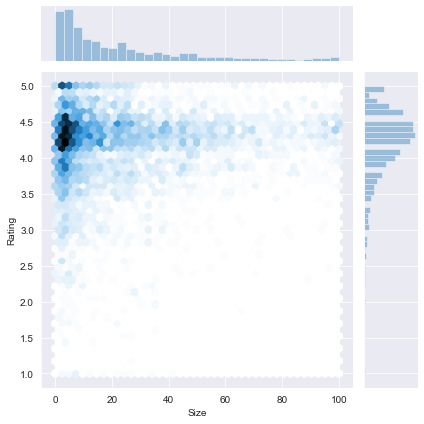

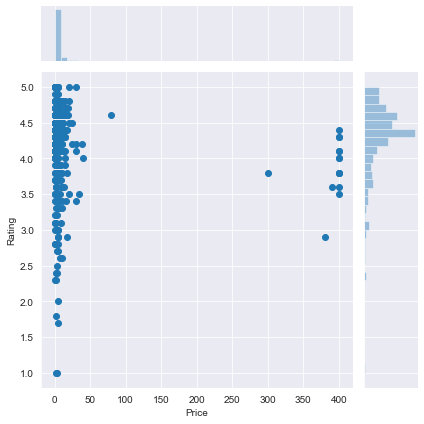

In [7]:
large_categories = apps.groupby('Category').filter(lambda x:len(x) >= 250).reset_index()

plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

paid_apps = apps[apps['Type']=='Paid']
plt2 = sns.jointplot(x = paid_apps['Price'],y = paid_apps['Rating'])

<p>大多数评分最高的应用（评分超过4分）的应用都在2MB到20MB之间。
<p>绝大多数应用程序的价格都在10美元以下。

### 6. 应用类别与应用价格的关系
<P>那么，企业和开发者该如何盈利？公司可以使用哪些策略来实现利润最大化？应用程序的成本主要是根据功能、复杂度和平台来决定的。
<P>为移动应用选择合适的定价策略时，需要考虑的因素很多。重要的是要考虑客户是否愿意为你的APP付费。

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


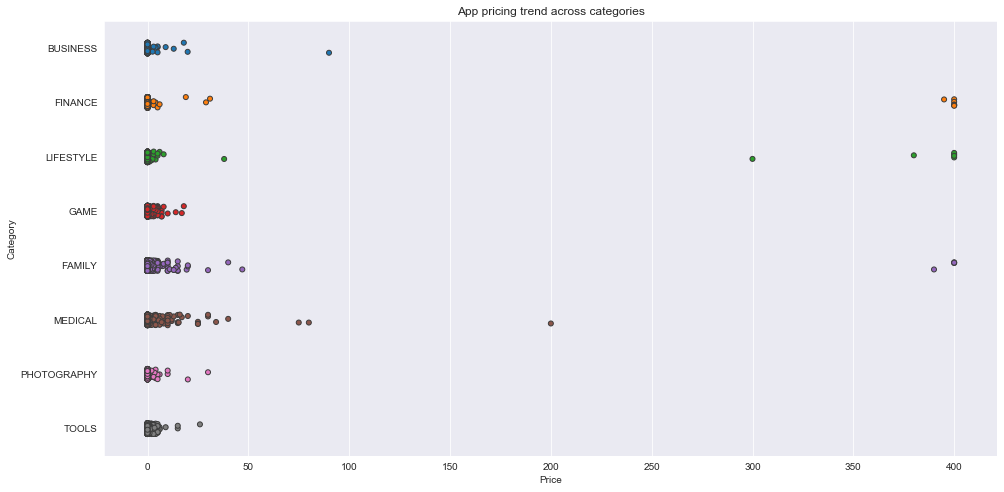

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE', 'LIFESTYLE','BUSINESS'])]
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

### 7. 过滤掉 "垃圾 "应用
<p>看起来，真正昂贵的应用程序中，有一堆是 "垃圾 "应用程序。也就是说，那些没有真正意义的应用。有的APP开发者可能会创建一个名为<em>I Am Rich Premium</em>或<em>最贵的APP(H)</em>的APP，只是为了开个玩笑或测试一下自己的APP开发能力。有些开发者甚至怀着恶意，希望人们在商店中不小心点击购买他们的应用，以此来赚钱。
<p>过滤掉这些垃圾应用，重新做可视化。

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

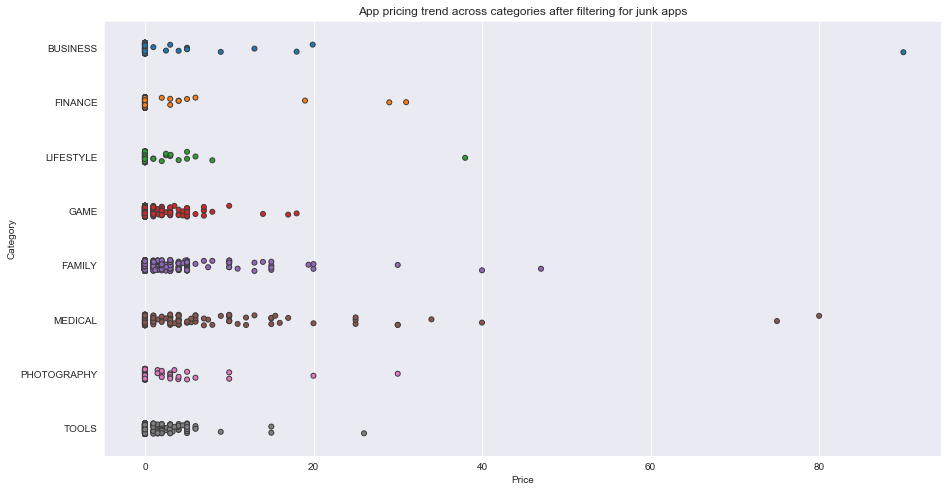

In [10]:
# 选择价格低于100的应用
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [ ]:
<P>医疗和家庭类APP是最贵的。有些医疗类APP甚至要80元。所有游戏APP的价格都在20元以下，价格合理。

### 8. 付费应用的受欢迎程度VS免费应用的受欢迎程度
<P>对于目前Play Store中的应用来说，有五种定价策略：free, freemium, paid, paymium,subscription。重点在免费和付费应用。
<p>付费应用的安装量是否和免费应用一样多？

In [11]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

事实证明，付费应用的安装量相对来说比免费应用的安装量要低！</p></p>

### 9. 用户评论的情绪分析

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

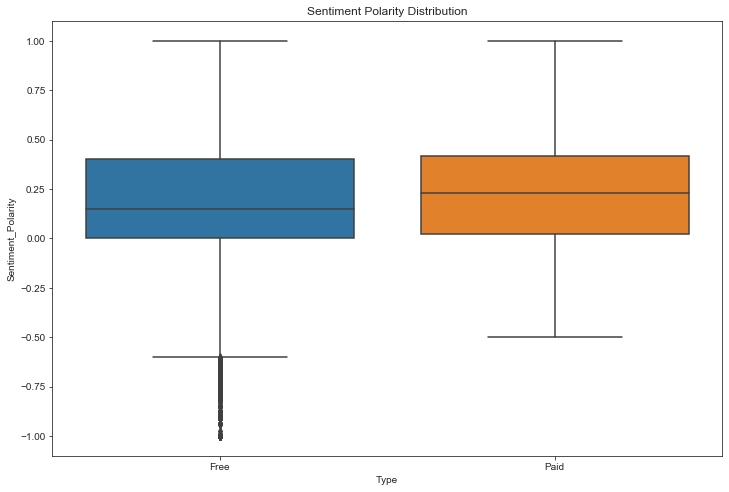

In [12]:
reviews_df = pd.read_csv('datasets/user_reviews.csv')
merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner")
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

ax = sns.boxplot(x ='Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

<p>通过绘制付费和免费应用的用户评论的情绪极性得分，可以发现，免费应用收到了很多苛刻的评论，如负轴上的离群值所示。付费应用的评论似乎从来没有极度负面。这可能说明了应用程序的质量，也就是说，付费应用程序的平均质量高于免费应用程序。付费应用的极性中位数得分略高于免费应用。